### Clustering
Let's say you have a chest filled with various fruits and divided into several groups, how would you separate them?

The key here is that we're not passing any labels, or training data, but rather let the model decide how should we group these types

Unsupervised learning basically takes no labels, but let model find patterns between these data, to correctly separate them

#### K-Means
As name suggests we're dealing with means, by establishing k points

Let's say you got 2 centroids(k), for each point on the graph you compare their distance, if the point is closer to k1 then assign it to k1, otherwise to k2.

Compute this for all points, you'll assign for each point their centroids.

Then we're going to move these centroids towards center of these linked points, by doing the average distance on each axis.

That will be the new centroid position, and repeat the process for few time, until the centroid is not changing that much, and now we got they separated

Iteration 1: [[np.float64(-5.340787222610852), np.float64(6.07291006757899)], [np.float64(-10.655322610053183), np.float64(7.147734195264276)]]


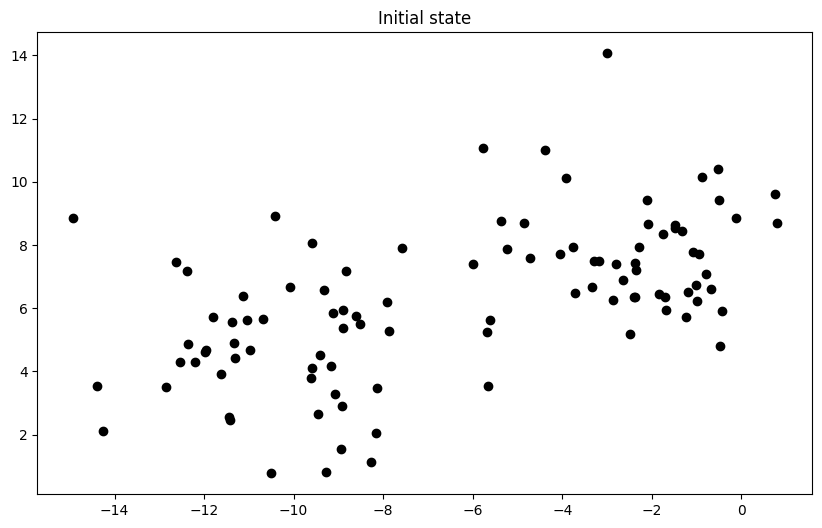

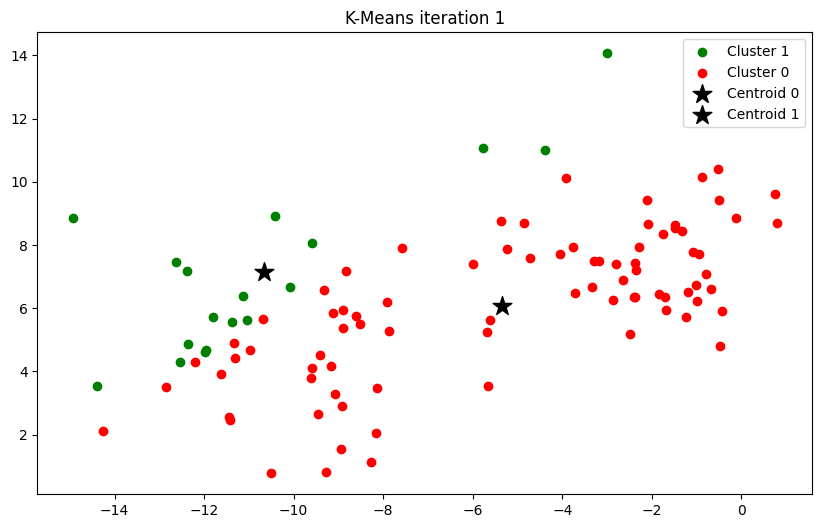

Iteration 2: [[np.float64(-3.1480925554202552), np.float64(7.228385766357106)], [np.float64(-10.829338986957367), np.float64(4.882026361979636)]]


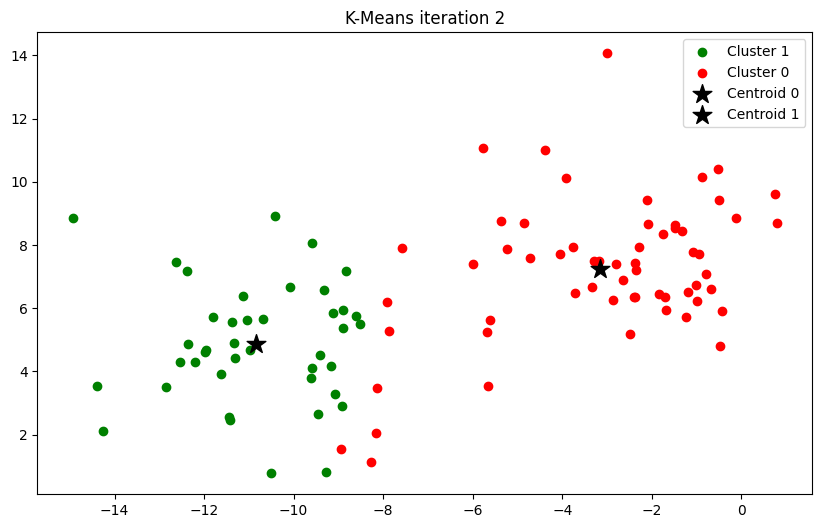

Iteration 3: [[np.float64(-2.47779731224762), np.float64(7.671456733015955)], [np.float64(-10.435310395795225), np.float64(4.744210227904264)]]


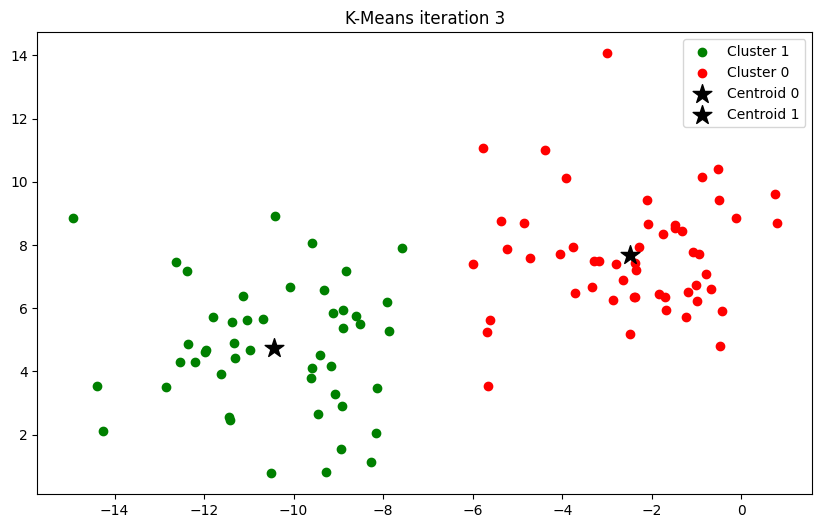

Iteration 4: [[np.float64(-2.4156036417445748), np.float64(7.752658743600687)], [np.float64(-10.337644357266813), np.float64(4.719433574134679)]]


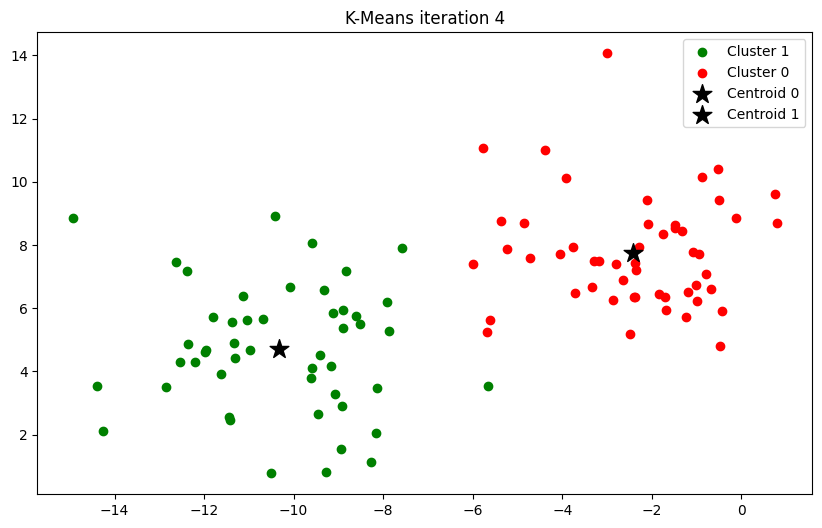

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from collections import defaultdict
import random

# Generate data
X, _ = make_blobs(n_samples=100, centers=2, cluster_std=1.8) 

plt.figure(figsize=(10, 6))
for arr in X:
    x, y = arr
    plt.scatter(x, y, color='black')
plt.title("Initial state")

'''
We'll use a hashmap for each centroid, keeping which points they should include
'''
def calculate_distance(centroid,x,y) -> int:
    return (centroid[0] - x)**2 + (centroid[1] - y)**2

def k_means(centroids,X):
    hashmap = defaultdict(list)
    nc = len(centroids)
    for x,y in X:
        min_cent = None
        min_dist = float('inf')
        # For each point we calculate the distance for each center
        for j in range(nc):
            distance = calculate_distance(centroids[j],x,y)
            if distance < min_dist:
                min_cent = j
                min_dist = distance
        hashmap[min_cent].append([x,y])
    return hashmap
    
def update(hashmap,centroids):
    # Iterate over the hashmap and get the new center for the centroid
    new_centroids = []
    for j in range(len(centroids)):
        points = hashmap[j]
        if points:
            currentX = 0
            currentY = 0
            for p in points:
                currentX += p[0]
                currentY += p[1]
            new_centroids.append([currentX / len(points),currentY / len(points)])
        else:
            # Don't need update
            new_centroids.append(centroids[j])
    return new_centroids

def init_random_centroids(X, k):
    X = np.array(X)
    centroids = []
    for _ in range(k):
        rand_x = np.random.uniform(X[:,0].min(), X[:,0].max())
        rand_y = np.random.uniform(X[:,1].min(), X[:,1].max())
        centroids.append([rand_x, rand_y])
    return centroids

def main(iter,k,X):
    # Init centoids
    centroids = init_random_centroids(X, k)
    for i in range(iter):
        hashmap = k_means(centroids,X)
        centroids = update(hashmap,centroids)
        print(f"Iteration {i+1}: {centroids}")
        plot_points(centroids,hashmap,i+1)
    return centroids

def plot_points(centroids,hashmap,i):
    plt.figure(figsize=(10, 6))
    
    # Different color for each cluster
    colors = ['red', 'green', 'orange', 'purple', 'cyan']
    
    for j, points in hashmap.items():
        xs = [p[0] for p in points]
        ys = [p[1] for p in points]
        plt.scatter(xs, ys, color=colors[j % len(colors)], label=f'Cluster {j}')
    
    # Plot centroids as big stars
    for j, (x, y) in enumerate(centroids):
        plt.scatter(x, y, color='black', marker='*', s=200, label=f'Centroid {j}')
    
    plt.title(f"K-Means iteration {i}")
    plt.legend()
    plt.show()

final_centroids = main(4,2,X)